# パーセプトロン

パーセプトロンの収束が保証されるのは、２つのクラスが線形分離可能で、学習率が十分に小さい場合に限られる。

２クラスを線形の決定境界で分離できない場合は、データセットに対する**レーニングの最大回数(エポック)**や**誤分類の最大数**を設定して対応する。

そうした措置を取らない場合、パーセプトロンはいつまでも重みを更新し続けることになる。

In [12]:
#パーセプトロンの実装
import numpy as np
class Perceptron(object):
    """
    パラメータ
    -----------
    eta : float
        学習率 0より大きく、１以下
    n_iter : int
        トレーニングデータのトレーニング回数
    random_state : int
        重みを初期化するための乱数シード
        
    属性
    -----------
    w_ : 1次配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類(更新)の数
    """

In [13]:
    def __init__(self, eta=0.01, n_iter=50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        トレーニングデータに適合させる

        パラメータ
        -----------
        X : shape = [n_samples, n_features]
            トレーニングデータ
        y : shape = [n_samples]
            目的変数

        戻り値
        -----------
        self : object
        """
    
        rgen = np.random.RandomState(self.random_state)
        #標準偏差0.01の正規分布から抽出される
        self.w_ = rgen.normal(loc=0.0, sclae=0.01, size=1+X.shape[1]) #.shape[1]は列数を返す
        self.errors = []
    

        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            errors = 0
            
            for xi, target in zip(X, y):# 各サンプルで重みを更新
                
                #重みの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi

                #重みw0の更新
                self.w_[0] += update

                # 重みの更新が 0 でない場合は誤分類としてカウント
                errors_ += int(update != 0.0)
            
            #反復回数ごとの誤差を格納
            self.errors_.append(errors_)
        
        return self

In [14]:
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**rgen** Numpyの乱数生成

# Irisデータセットでのパーセプトロンモデルのトレーニング
<p>一対全（One versus All, OvA）</p>

In [15]:
#データの読み込み
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header = None)

In [16]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
"""
Iris-setosaの50枚の花と、Iris-versicolorの50枚の花に対応する先頭の100個のクラスラベルを抽出する。

versicolorをベクトル1、setosaを‐1に変換する。

特徴量は1列目（がく片）と3列目（花びらの長さ）だけを抽出して使う。

"""

import matplotlib.pyplot as plt
import numpy as np

#1-100行の目的変数yの抽出
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
# setosa => -1, verisicolor => 1
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [19]:
#特徴量生成
#1－100行目の1、3列目を抽出する
X = df.iloc[0:100, [0,2]].values

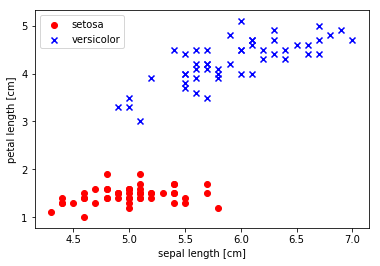

In [20]:
#品種setosaのプロット
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
#軸ラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
#凡例の設定(左上に配置)
plt.legend(loc = 'upper left')
#図の表示
plt.show()

上図を見ると線形の決定境界で十分であることがわかる。

→パーセプトロンなどの線形分類器を使用する

Irisのサブセットでパーセプトロンモデルのアルゴリズムをトレーニングしてみる

In [21]:
#トレーニングデータへのモデル適合
ppn.fit(X, y)

#エポックと誤分類誤差の関係の折れ線をプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')

#軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of Update')

#図の表示
plt.show()

NameError: name 'ppn' is not defined

エポックが増えると誤差が小さくなっていくことがわかる

決定境界を可視化してみる

In [22]:
from matplotlib.colors import ListedColormap

def plot_dicision_regions(X, y, classifier, resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1

    #グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    #各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線プロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor = 'black')
    

In [23]:
#決定境界のプロット
plot_dicision_regions(X, y, classifier=ppn)

NameError: name 'ppn' is not defined

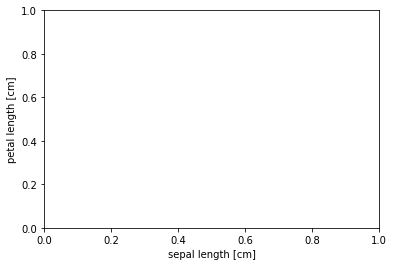

In [24]:
# 軸のラベル設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

#凡例の設定左上
plt.legend(loc = 'upper left')

plt.show()

パーセプトロンは線形超平面で分割できる場合のみ。
データの分布を見てから適用するかどうかを決めた方が良い。

# ADALINE(ADAptivev LInear NEuron)

ADALINEはパーセプトロンと異なり、重みの更新方法が単位ステップ関数ではなく、線形活性化関数。層入力の恒等関数。

**目的関数(objective function)** 学習過程で最適化される関数　＝＞　最小化させたい**コスト関数(cost function)**

ADALINEはコスト関数をJで定義する
誤差平方和として学習する